In [2]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

In [10]:
# Define the dimensions to iterate over
num_dimesions = 10
dimensions = [2**i for i in range(num_dimesions+1)]

# Function to calculate squared Euclidean distance
def squared_euclidean_distance(x, y):
    return np.sum((x - y) ** 2)

# Function to calculate Manhattan distance
def manhattan_distance(x, y):
    return np.sum(np.abs(x - y))

# Function to sample points and calculate average distance and standard deviation
def calculate_distances(dim, distance_func):
    distances = []
    for _ in range(100):
        # Generate 100 points in the unit cube for given dimension
        points = np.random.rand(100, dim)
        # Calculate distances between all pairs of points
        pair_distances = [distance_func(p1, p2) for p1, p2 in combinations(points, 2)]
        distances.extend(pair_distances)
    # Calculate average distance and standard deviation
    avg_distance = np.mean(distances)
    std_deviation = np.std(distances)
    return avg_distance, std_deviation

In [11]:
# Record average distances and standard deviations for each dimension for both distance metrics
results_euclidean = {'avg': [], 'std': []}
results_manhattan = {'avg': [], 'std': []}

for dim in dimensions:
    avg_dist_euclidean, std_dev_euclidean = calculate_distances(dim, squared_euclidean_distance)
    avg_dist_manhattan, std_dev_manhattan = calculate_distances(dim, manhattan_distance)
    results_euclidean['avg'].append(avg_dist_euclidean)
    results_euclidean['std'].append(std_dev_euclidean)
    results_manhattan['avg'].append(avg_dist_manhattan)
    results_manhattan['std'].append(std_dev_manhattan)


In [13]:
# Print results for Euclidean distance
print("Euclidean Distance:")
print("Dimension\tAverage Distance\tStandard Deviation")
for dim in range(num_dimesions + 1):
    print(
        f"{dim}\t\t{results_euclidean['avg'][dim]}\t\t{results_euclidean['std'][dim]}"
    )

# Print results for Manhattan distance
print("\nManhattan Distance:")
print("Dimension\tAverage Distance\tStandard Deviation")
for dim in range(num_dimesions + 1):
    print(
        f"{dim}\t\t{results_manhattan['avg'][dim]}\t\t{results_manhattan['std'][dim]}"
    )

Euclidean Distance:
Dimension	Average Distance	Standard Deviation
0		0.16844562299807778		0.19946727591591923
1		0.33050963426483054		0.2768411422169952
2		0.6708582814644877		0.39631930393501713
3		1.3303160623521209		0.5563861424273845
4		2.6608642226443573		0.7899616314992527
5		5.323990047518491		1.1125503920611945
6		10.664743327589624		1.5785332531048293
7		21.320449052390153		2.2241549602997193
8		42.67480301223232		3.1553164728953464
9		85.40117384140478		4.45755629739194
10		170.69824454195725		6.318736102242051

Manhattan Distance:
Dimension	Average Distance	Standard Deviation
0		0.3353698616911999		0.2370315428526465
1		0.6653697721098842		0.33286764746926367
2		1.3361523411977536		0.4742895670034423
3		2.66525802579887		0.6659717395348596
4		5.330306972714467		0.9430882647131487
5		10.639927499343276		1.3300397697546962
6		21.333617252261682		1.8868885319405193
7		42.685554610278004		2.671876387383754
8		85.33074328200219		3.7663722634428654
9		170.6115331249971		5.31723527

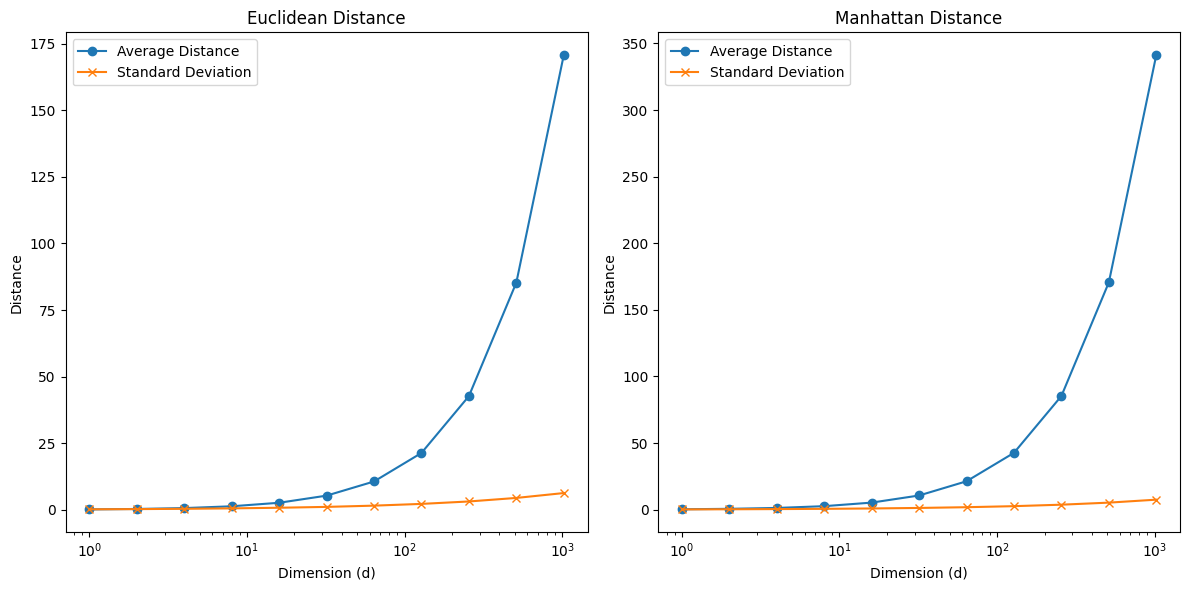

In [5]:
# Plotting
plt.figure(figsize=(12, 6))

# Plot for Euclidean distance
plt.subplot(1, 2, 1)
plt.plot(dimensions, results_euclidean['avg'], label='Average Distance', marker='o')
plt.plot(dimensions, results_euclidean['std'], label='Standard Deviation', marker='x')
plt.title('Euclidean Distance')
plt.xlabel('Dimension (d)')
plt.ylabel('Distance')
plt.xscale('log')
plt.legend()

# Plot for Manhattan distance
plt.subplot(1, 2, 2)
plt.plot(dimensions, results_manhattan['avg'], label='Average Distance', marker='o')
plt.plot(dimensions, results_manhattan['std'], label='Standard Deviation', marker='x')
plt.title('Manhattan Distance')
plt.xlabel('Dimension (d)')
plt.ylabel('Distance')
plt.xscale('log')
plt.legend()

plt.tight_layout()
plt.show()